# HyperCAT  Interferometry module

This notebook shows examples on how to use the interferometry module of HyperCAT. You will find here the general worksflow to obtain simulated interferomeric observations for a given AGN torus and uv plane defined byt he user.

In [47]:
# IMPORTS
import hypercat as hc
import interferometry as inter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ioops as io

In [ ]:
#For more information about to select subcubes and make a source check the hypercat_workflow.ipynb notebook.

# Load a sub-cube into RAM
hdf5file = '/Volumes/Seagate Backup Plus Drive/hypercat/hypercat_20170109.hdf5'
cube = hc.ModelCube(hdffile=hdf5file,hypercube='imgdata',subcube_selection='../examples/democube.json')

#Make a source
ngc1068 = hc.Source(cube,luminosity='2e45 erg/s',distance='14 Mpc',name='ngc1068',pa='42 deg')  

#Select a clumpy torus image and wavelength. Assuming a flux density of 2500 mJy at 8.5 microns.
i = 88
N = 5
q = 0
wave = 8.0
theta = (i,N,q,wave)
sky = ngc1068(theta,total_flux_density='2500 mJy')

In [48]:
### Check with Gaussian
# to check the functions a Gaussian is used. The 2D Gaussian named 'ori' should be the 2D clumpy image.
g   = models.Gaussian2D(amplitude=100, x_mean=0, y_mean=0, x_stddev=0.5, y_stddev=0.5, theta=0)

xx = np.linspace(-10,10,100)
x,y = np.meshgrid(xx,xx)

ori = g(x,y) 

#Create 2D FFT of clumpy torus image
ori_fft = inter.ima2fft(ori)
#Obtain pixel scale
fftscale = inter.fft_pxscale(ori)
#Obtain uv points
filename = '../examples/Circinus_Burtscher_2013.oifits' 
u,v = uvload(filename)
#obtain baseline and position angles in 1D
BL, Phi = baseline_phase_1D(u,v)
#Obtain uv plane in pixels
u_px,v_px = uvfreq2uvpixel(u,v,fftscale)
#Obtain correlated flux 2D
corrflux2D = inter.correlatedflux2D(ori_fft,u_px,v_px,BL,Phi)
#Obtain correlated flux 1D
corrflux1D = inter.correlatedflux1D(corrflux2D[0])

Pixel scale in FFT image is:  2.52064552972  m (Baseline) per pixel


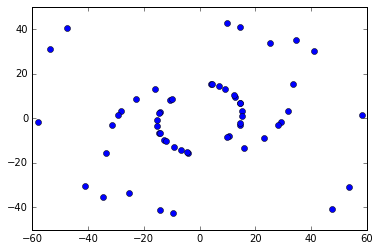

In [49]:
plt.plot(u,v,'o')

In [38]:
def uvload(filename):
    ff = io.FitsFile(filename)

    #uv points
    v = ff.getdata(4,'vcoord')
    u = ff.getdata(4,'ucoord')
    # create the center-symmetric points
    u_rev=-u
    v_rev=-v
    
    #combine the data set of uv points
    u = np.concatenate([u_rev,u])
    v = np.concatenate([v_rev,v])
    
    return u,v

def baseline_phase_1D(u,v):
    #Baseline and phases in 1D
    BL = np.sqrt(u**2+v**2)
    Phi = np.rad2deg(np.arctan(u/v))
    
    return BL, Phi



def uvfreq2uvpixel(u,v,fftscale):
    ### uv plane from m to px given the above estimated pixel scale per meter
    u_px = u/fftscale
    v_px = v/fftscale
    
    return u_px, v_px

In [42]:
filename = '../examples/Circinus_Burtscher_2013.oifits' 
u,v = uvload(filename)
BL_Phi = baseline_phase_1D(uv[0],uv[1])


In [22]:
f = '../examples/Circinus_Burtscher_2013.oifits'
ff = fits.open(f)

In [32]:
ff['OI_VIS'].data['UCOORD']

array([-14.36642265, -29.11819649, -15.95842075,  34.63849258,
        41.06572342,  58.06918335,  53.64641571,  47.40750885,
         9.68784142,  25.28550148,  33.43816757,  31.51840591,
        28.02976418,  22.91212654,   4.04968882,   6.80267477,
        12.74985504,  14.39439678,  15.21711254,  14.30192757,
        10.59840679,   9.9192009 ,   4.47123003,   9.22733784,
        12.21317959,  14.37120724,  15.23608589,  14.58623314])

In [43]:
import astropy.io.fits as fits
from astropy.modeling import models